**Inferential Statistics - Week 4**

# Inference for Proportions

- Inference for proportions works with **categorical variables**.
- One categorical variable
  - Two levels: success-failure
  - More than two levels
- Two categorical variables
  - Two levels: success-failture
  - More than two levels

## Sampling Variability and CLT for Proportions

### Central Limit Theorem for a Proportion 

- When observations are independent and the sample size is sufficiently large, the sample proportion $\hat{p}$ will tend to follow a normal distribution with the following mean and standard error.

### Mean for a Proportion 

$$
\mu = p
$$

### Standard Error for a Proportion 

$$
SE = \sqrt{\frac{p(1-p)}{n}}
$$

### Conditions for Central Limit Theorem for a Proportion 

- Independence
- **Success-Failure Condition**: The sample size should be sufficiently large with $np \ge 10$ and $n(1-p) \ge 10$.


- If the success-failure condition is not met:
- The center of the sampling distribution will still be around the true population proportion.
- The spread of the sampling distribution can still be approximated using the same formula for the standard error.
- The shape of the distribution will depend on whether the true population proportion $p$ is closer to 0 or closer to 1.

**Example**

- 90% of all plant species are classified as angiosperms. These are flowering plants. 
- If you were to randomly sample 200 plants from the list of all known plant species, what is the probability that at least 95% of the plants in your sample will be flowering plants?

In [1]:
p = 0.9
n = 200
# P(p_hat > 0.95)?
p_hat = 0.95

In [3]:
# Check the conditions:
# 1. Random sampled + 10% of all plants -> Independent 
# 2. Success-failure condition
(n_success = n * 0.9)
(n_failure = n * (1-0.9))

[1] 180

[1] 20

In [7]:
(se = sqrt(p * (1-p) / n))
(z = (p_hat - p) / se)
(prob = pnorm(z, lower.tail = FALSE))

[1] 0.0212132

[1] 2.357023

[1] 0.009211063

- If you were to randomly sample 200 plants from the list of all known plant species, would it be considered unusual if 87.5% of the plants in a random sample of 200 were angiosperms?

In [8]:
# 0.875 is within 2 se from the sample mean,
# hence it is not unusual.
p_hat = 0.875
(z = (p_hat - p) / se)

[1] -1.178511

- What would you expect the shape of the sampling distribution of percentages of angiosperms in random samples of 50 plants to look like? (Remember, 90% of all plants species are classified as angiosperms.)

In [9]:
# The success-failture condition does not met
# as the number of failure is 5, which is smaller
# than 10. The shape of the sampling distribution
# will be strongly left skewed as p = 0.9.
(n_success = 50 * 0.9) 
(n_failture = 50 * 0.1)

[1] 45

[1] 5

## Confidence Interval for a Proportion 

### Confidence Interval for a Proportion 

$$
\text{CI} = \hat{p} \pm z^\star SE_{\hat{p}}
$$

### ME for a Proportion 

$$
\text{ME} = z^\star \sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
$$

- If we have the value of $\hat{p}$, we can use that in the calculation of the required sample size.
- If not, use $\hat{p} = 0.5$. 50-50 is a good guess. It
gives the most conservative estimate - highest possible sample size.

**Example**

- The general social survey found that 571 out of 670, that's roughly 85% of Americans, answered the question on experiment design correctly. 
- We are asked to estimate using a 95% confidence interval, the proportion of all Americans who have good intuition about experiment design.

In [20]:
n = 670
(p = 571/670)
(se = sqrt(p * (1-p) / n))
(me = 1.96 * se)
p - me; p + me
# We are 95% confident that 82.5% to 88.9% of all Americans
# have good intuition about experimental design.

[1] 0.8522388

[1] 0.01370956

[1] 0.02687073

[1] 0.8253681

[1] 0.8791095

- The margin of error for this previous confidence interval was 2.7%. If, for a new confidence interval based on a new sample, we wanted to reduce the margin of error to 1% while keeping the confidence level the same. At least how many respondents should we sample? 

In [21]:
# me = z * se
# me = z * sqrt(p * (1 - p) / n)
# n = (p * (1 - p)) / (me / z)^2
ceiling(p * (1 - p) / (0.01 / 1.96)^2)

[1] 4838

- If we wanted to estimate the percentage of Data Analysis and Statistical Inference students who have good intuition about experimental design using a 95% confidence interval and a margin of error no larger than 3%, at least how many students would we need to sample?

In [22]:
# me = z * sqrt(p * (1 - p) / n)
# n = (p * (1 - p)) / (me / z)^2
n = (0.5 * 0.5) / (0.03 / 1.96)^2
ceiling(n)

[1] 1068

## Hypothesis Test for a Proportion 

- When we check the success-failure condition for the convidence interval, we use the **observed proportion**.
- When we check the success-failure condition for doing a hypothesis test, we use the **expected proportion** (the null proportion).

### Hypothesis Testing for a Proportion 

$$
H_0: p = \text{null value}\\
H_A: p < or > or\ne \text{null value}
$$

**Example**

- A 2013 Pew Research poll found that 60% of 1,983 randomly sampled American adults believe in evolution. Does this provide convincing evidence that majority of Americans believe in evolution?

In [23]:
n = 1983
p = 0.5
p_hat = 0.6

# Randomly sampled + n < 10% of population -> independent
# Success-failure condition calculate with expected p (the null p) -> true
(success_failure = (n * p) > 10 & (n * (1 - p)) > 10)

# H0: p = 0.5
# HA: p > 0.5

(se = sqrt(p_hat * (1 - p_hat) / n))
(z = (p_hat - p) / se)
(pvalue = pnorm(z, lower.tail = FALSE))

# The p-value is significantly smaller than the significance level 0.05,
# hence reject null hypothesis and conclude that there is strong evidence
# convincing that the majority (> 0.5) of American adults believe in evolution.

# There is almost 0% chance of obtaining a random sample of 1,983 Americans where 60% or more believe in evolution, if in fact 50% of Americans believe 
# in evolution.

[1] TRUE

[1] 0.01100131

[1] 9.089829

[1] 4.959725e-20

## Estimating the Difference Between Two Proportions 

- To estimate the difference between two proportions, we label one of our categorical variables the **explanatory variable** and the other one our **response variable**.

### Standard Error for the Difference between Two Proportions 

$$
SE = \sqrt{
\frac{\hat{p}_1(1-\hat{p}_1)}{n_1} +
\frac{\hat{p}_2(1-\hat{p}_2)}{n_2}
} 
$$

### Confidence Interval for the Difference between Two Proportions 

$$
\text{CI} = (\hat{p}_1 - \hat{p}_2) \pm z^\star SE_{(\hat{p}_1 - \hat{p}_2)}
$$

### Conditions for Comparing two Independent Proportions 

- Independence
  - Within groups
    - Random sample / assignment
    - If sampling without replacement, n < 10% of population
  - Between groups
    - The two groups must be independent of each other (non-paired)
- Success-failure condition
  - Each sample should meet the success-failure condition

**Example**

- How do Coursera students and the American public at large compare with respect to their views on laws banning possession of handguns?

In [33]:
data.frame(
  `.` = c('US', 'Coursera'),
  suc = c(257, 59),
  n = c(1028, 84),
  p_hat = c(0.25, 0.71)
)

.,suc,n,p_hat
<fct>,<dbl>,<dbl>,<dbl>
US,257,1028,0.25
Coursera,59,84,0.71


In [26]:
p_c = 0.71
n_c = 84

p_us = 0.25
n_us = 1028

(se = sqrt(p_c*(1-p_c)/n_c + p_us*(1-p_us)/n_us))

(p = p_c - p_us)
p - 1.96 * se; p + 1.96 * se

[1] 0.05131845

[1] 0.46

[1] 0.3594158

[1] 0.5605842

- Based on the confidence interval we calculated, should we expect to find a significant difference (at the equivalent significance level) between the population proportions of Coursera students and the American public at large who believe there should be a law banning the possession of handguns?

In [27]:
# In this hypothesis test the null value for the difference
# between the two population proportions 
# would be 0, and 0 isn't in the interval, hence 
#we should expect to find a difference.

## Hypothesis Test for Comparing Two Proportions 

- Recall that when we check the success-failure condition for doing a hypothesis test, we use the **expected proportion** (the null proportion).
- But for doing a hypothesis test with two proportions, since the null value is $H0: p1 = p2$, we use the **pooled proportion**.

### Pooled Proportion 

$$
\begin{align}
\hat{p}_{pool} &= \frac{\text{total success}}{\text{total }n} \\
&= \frac{\text{# of success}_1 + \text{# of success}_2}
{n_1 + n_2}
\end{align}
$$

- The success-failure condition is thus $n_1 \hat{p}_{pool} \ge 10$, $n_1 (1 - \hat{p}_{pool}) \ge 10$, $n_2 \hat{p}_{pool} \ge 10$, $n_2 (1 - \hat{p}_{pool}) \ge 10$.

### Standard Error for Hypothesis Test for Comparing Two Proportions

$$
SE = \sqrt{
\frac{\hat{p}_{pool}(1-\hat{p}_{pool})}{n_1} +
\frac{\hat{p}_{pool}(1-\hat{p}_{pool})}{n_2}
} 
$$

**Example**

- Evaluate whether males and females are equally likely to answer "Yes" to the question about whether any of their children have ever been the victim of bullying.

In [32]:
data.frame(
  `.` = c('Male', 'Female'),
  yes = c(34, 61),
  no = c(52, 61),
  not_sure = c(4, 0),
  total = c(90, 122),
  p_hat = round(c(34/90, 61/122), 2)
)

.,yes,no,not_sure,total,p_hat
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Male,34,52,4,90,0.38
Female,61,61,0,122,0.50


In [29]:
# H0: p_male = p_female
# HA: p_male != p_female

p_male = 0.38
p_female = 0.50

n_male = 90
n_female = 122

(p_pool = (34 + 61) / (n_male + n_female))

conditions = n_male * p_pool >= 10 &
  n_male * (1 - p_pool) >= 10 &
  n_female * p_pool >= 10 &
  n_female * (1 - p_pool) >= 10

(p = p_male - p_female)

(se = sqrt(
  p_pool*(1-p_pool)/n_male + p_pool*(1-p_pool)/n_female
))

(z = (p - 0) / se)

(pvalue = pnorm(z) * 2)

[1] 0.4481132

[1] -0.12

[1] 0.06910121

[1] -1.736583

[1] 0.08246075

# Simulation Based Inference for Proportions and Chi-Square Testing 

## Small Sample Proportions

- When sample size is too small, the success-failure condition is not met.
- Hence, we cannot rely on the central limit theorem to do our inference.
- Under such circumstance, **simulation-based inference** comes to our rescue.


- The ultimate goal of a hypothesis test is a p-value.
- Inference via simulation devise a simulation scheme that assumes the null hypothesis is true.
- Repeat the simulation many times and record relevant sample statistic.
- Calculate p-value as the proportion of simulations that yield a result favorable to the alternative hypothesis.

**Example**

Paul the Octopus predicted 9 World Cup games, and predicted them all correctly. Does this provide convincing evidence that Paul actually has psychic powers? In other words, that he does better than just randomly guessing. 

In [15]:
library(statsr)
options(repr.plot.width = 10, repr.plot.height = 3)

Single proportion -- success: yes 
Summary statistics: p_hat = 1 ;  n = 8 
H0: p = 0.5 
HA: p > 0.5 
p-value =  0.0036 


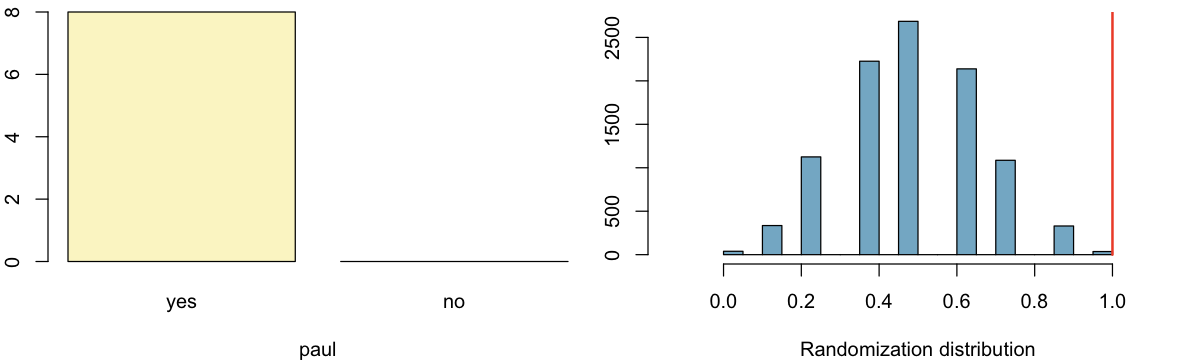

In [11]:
# H0: p = 0.5
# HA: p > 0.5
n = 8
p_hat = 1

# p_value = p(p_sim > 1 | p = 0.5)

paul = factor(
    c(rep("yes", 8), rep("no", 0)), 
    levels = c("yes", "no")
)
inference(
    paul, est = 'proportion', type = 'ht', method = 'simulation',
    success = 'yes', null = 0.5, alternative = 'greater'
)

**Example**

- There's a saying in English," to know something like the back of your hand", which means to know something very well. Myth Busters, a popular TV show, put to test the validity of the saying. They recruited 12 volunteers, each of whom were shown 10 pictures, of backs of their hands, while wearing gloves, so they couldn't actually see their own hands, and they were asked to identify their own hand among the ten pictures.
- Eleven out of twelve people completed the task successfully, meaning they were indeed able to recognize the backs of their own hands.
- What are the hypotheses for evaluating whether these data provide convincing evidence of the validity of the saying. In other words, that people do better than random guessing when it comes to recognizing the back of their own hand.

Single proportion -- success: correct 
Summary statistics: p_hat = 0.9167 ;  n = 12 
H0: p = 0.1 
HA: p > 0.1 
p-value =  0 


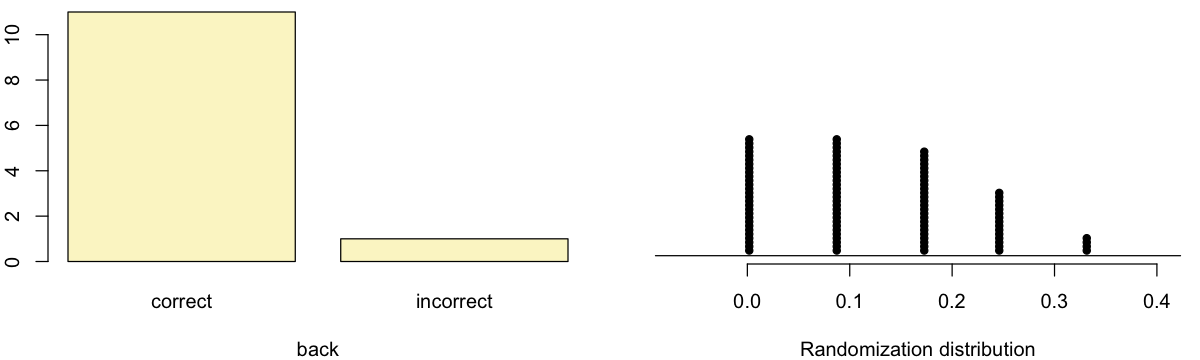

In [26]:
# H0: p = 0.1
# HA: p > 0.1

# 1. Use a *10-sided* fair die to represent the sampling 
# space, and call 1 a success, and all other outcomes
# failures.

# 2. Roll the die *12* times (each representing one of *12*
# people in the experiment), count the number rolls that resulted
# in *ones*, and calculate the proportion of correct guess in one
# simulation of *12* rolls.

# 3. Repeat step (2) 100 times, each time recording the proportion
# of simulated successes in a series of *12* rolls of the die.

# 4. Creat a dot plot of the *simulated* proportions from
# step (3) and count the number of simulations where the proportion
# is *11/12 or greater* (the *observed* proportion).

back = factor(
    c(rep("correct", 11), rep("incorrect", 1)),
    levels = c("correct", "incorrect")
)
inference(
    back, est = 'proportion', type = 'ht',
    success = 'correct', method = 'simulation',
    null = 0.1, alternative = 'greater', nsim = 100
)

# p_value = P(p_hat >= 0.9167 | p = 0.10)

## Comparing Two Small Sample Proportions

**Example**

- Do these data provide convincing evidence that there is a difference in how good people are at recognizing the backs and the palms of their hands? 

In [30]:
data.frame(
    `.` = c("back", "palm", "total"),
    correct = c(11, 7, 18),
    incorrect = c(1, 5, 6),
    total = c(12, 12, 24),
    p_hat = c(0.9167, 0.5833, 0.75)
)

.,correct,incorrect,total,p_hat
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
back,11,1,12,0.9167
palm,7,5,12,0.5833
total,18,6,24,0.7500


In [31]:
# H0: p_back - p_palm = 0
# HA: p_back - p_palm != 0

# 1. We have 24 trials so we can use 24 index cards, 
# where each card represents a subject or a guess at least. 

# 2. We mark 18 of the cards as correct and the 
# remaining six as wrong. 

# 3. We shuffle the cards and split them into two groups 
# of size 12 for back of the hand and palm of the hand. 

# 4. Then we calculate the difference between the proportions
# of quote unquote correct, in the back and palm decks and 
# record this number. 

# 5. Finally, we repeat steps three and four many, 
# many times to build our randomization distribution of 
# differences in simulated proportions.

## Chi-Square GOF Test

- Quantify how different the observed **counts** are from the expected counts.
- Large deviations from what would be expected base on sampling variation (chance) alone provide strong evidence for the alternative hypothesis.
- This is called a **goodness-of-fit** test since we're evaluating how well the observed data **fit** the expected distribution.

### Conditions for Chi-Square Test

- **Independence**: Sample observations must be independent.
    - Random sample / assignment.
    - If sampling without replacement, n < 10% of polulation.
    - Each case only contributes to one cell in the table.
- **Sample Size**: Each particular scenario (e.g. cell) must have at least 5 expected cases.

### Chi-Square Statistic

- When dealing with counts and investigating how far the observed counts are from the expected counts, we use a new test statistic called the **chi-square $\chi^2$ statistc**.

$$
\chi^2 = \sum^k_{i=1} \frac{(O-E)^2}{E}
$$

- $O$: observed
- $E$: expected
- $k$: number of cells


- Why square?
- **Positive** standardized difference.
- Highly unusual differences between observed and expected will appear even more unusal.

### Degrees of Freedom 

- To determine if the calculated $\chi^2$ statistic is considered unusally high or not we need to first describe its distribution.
- Chi-square distribution has just one parameter **degrees of freedom** (df).

$$
df = k - 1
$$

- $k$: number of cells

### P-Value

- The p-value for a chi-square test is defined as the tail area **above** the calculated test statistic.
- Because the test statistic is always positive, and a higher test statistic means a higher deviation from the null hypothesis.

**Example**

- In a county where jury selection is supposed to be random, a civil rights group sues the county, claiming racial disparities in jury selection. 
- Distribution of ethnicities of people in the county who are eligible for jury duty based on census results are given in this table.

In [36]:
data.frame(
    ethnicity = c('white', 'black', 'nat_amer', 'asian_pi', 'other'),
    percent_population = c(.8029, .1206, .0079, .0292, .0394)
)

ethnicity,percent_population
<fct>,<dbl>
white,0.8029
black,0.1206
nat_amer,0.0079
asian_pi,0.0292
other,0.0394


- We are also given the distribution of 2500 people who were selected for jury duty in the previous year.

In [37]:
data.frame(
    ethnicity = c('white', 'black', 'nat_amer', 'asian_pi', 'other'),
    n_observed = c(1920, 347, 19, 84, 130)
)

ethnicity,n_observed
<fct>,<dbl>
white,1920
black,347
nat_amer,19
asian_pi,84
other,130


- The court retains you as an independent expert to assess the statistical evidence that there was discrimination. You propose to formulate this issue as a hypothesis test.

In [38]:
# H0: People selected for jury duty are a simple random sample
# from the population of potential jurors. The observed counts
# of jurors from various race/ethnicities *follow the same*
# ethnicity *distribution* in the polulation.

# HA: People selected for jury duty are not a simple random sample
# from the population of potential jurors. The observed counts
# of jurors from various race/ethnicities *do not follow the same*
# ethnicity *distribution* in the polulation.

- Calculate expected number of jurors from each ehnicity if in fact the jury selection is random.

In [39]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [43]:
data.frame(
    ethnicity = c('white', 'black', 'nat_amer', 'asian_pi', 'other', 'total'),
    percent_population = c(.8029, .1206, .0079, .0292, .0394, 1),
        n_observed = c(1920, 347, 19, 84, 130, 2500)
) %>% mutate(n_expected = 2500 * percent_population)

ethnicity,percent_population,n_observed,n_expected
<fct>,<dbl>,<dbl>,<dbl>
white,0.8029,1920,2007.25
black,0.1206,347,301.50
nat_amer,0.0079,19,19.75
asian_pi,0.0292,84,73.00
other,0.0394,130,98.50
total,1.0000,2500,2500.00


In [49]:
(chi2 = (1920 - 2007)^2/2007 +
    (347-302)^2/302 +
    (19-20)^2/20 +
    (84-73)^2/73 +
    (130-98)^2/98)

(df = 5 - 1)

(pchisq(chi2, df, lower.tail = FALSE))

[1] 22.63311

[1] 4

[1] 0.0001498896

## The Chi-Square Independence Test

- Categorical variables with more than two levels with the chi-sqare independence test.
- Explanatory variable on the x-axis, response variable on the y-axis.


- To evaluate these hypotheses just like with the chi square test of goodness of fit, we quantify how different the observed counts are from the expected counts. 
- Large deviations from what would be expected based on sampling variation or chance alone provide strong evidence for the alternative hypothesis.
- This is called an **independence test** since we're evaluating the relationship between two categorical variables.


### Chi-Square Statistic

- The same as the chi-square GOF test.

$$
\chi^2 = \sum^k_{i=1} \frac{(O-E)^2}{E}
$$

- $O$: observed
- $E$: expected
- $k$: number of cells

$$
E = \frac{(\text{row total} \times \text{column total})}{\text{table total}}
$$

### Degrees of Freedom 

- The calculation of degrees of freedom is different from that of the GOF test.

$$
df = (R-1) \times (C-1)
$$

- $R$: number of rows
- $C$: number of columns

**Example**
- Does there appear to be a relationship between weight and relationship status?

In [1]:
data.frame(
    `.` = c('obese', 'not obese', 'total'),
    dating = c(81, 359, 440),
    cohabiting = c(103, 326, 429),
    married = c(147, 277, 424),
    total = c(331, 962, 1293)
)

.,dating,cohabiting,married,total
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
obese,81,103,147,331
not obese,359,326,277,962
total,440,429,424,1293


In [2]:
# H0: Weight and relationship status are independent 
# Obesity rates do not vary by relationship status.
# HA: Weight and relationship status are dependent. 
# Obesity rates do vary by relationship status.

- What is the overall obesity rate in the sample? 

In [3]:
(p_obese = 331/1293)

[1] 0.2559938

- If in fact weight and relationship status are independent, in other words, if in fact the null hypothesis is true, how many of the dating people would we expect to be obese? Likewise, how many of the cohabiting and married people would we expect to be obese?

In [5]:
(p_dating_obese = 440 * p_obese)
(p_cohabit_obese = 429 * p_obese)
(p_married_obese = 424 * p_obese)

[1] 112.6373

[1] 109.8213

[1] 108.5414

- If in fact weight and relationship status are independent, how many of the dating people would we expect to be not obese?

In [6]:
962*440/1293

[1] 327.3627

- Test the hypothesis that relationship status and obesity are associated at the 5% significance level.

In [10]:
(observed = data.frame(
    `.` = c('obese', 'not obese', 'total'),
    dating = c(81, 359, 440),
    cohabiting = c(103, 326, 429),
    married = c(147, 277, 424),
    total = c(331, 962, 1293)
))

.,dating,cohabiting,married,total
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
obese,81,103,147,331
not obese,359,326,277,962
total,440,429,424,1293


In [19]:
expected = observed

expected[1,'dating'] = observed[1,5] * observed[3,2]/1293
expected[1,'cohabiting'] = observed[1,5] * observed[3,3]/1293
expected[1,'married'] = observed[1,5] * observed[3,4]/1293

expected[2,'dating'] = observed[2,5] * observed[3,2]/1293
expected[2,'cohabiting'] = observed[2,5] * observed[3,3]/1293
expected[2,'married'] = observed[2,5] * observed[3,4]/1293

(expected)

.,dating,cohabiting,married,total
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
obese,112.6373,109.8213,108.5414,331
not obese,327.3627,319.1787,315.4586,962
total,440.0000,429.0000,424.0000,1293


In [20]:
(chi2 = (81 - 113)^2/113 +
    (103 - 110)^2/110 +
    (147 - 108)^2/108 +
    (359 - 327)^2/327 +
    (326 - 319)^2/319 +
    (277 - 316)^2/316)

[1] 31.68913

In [21]:
(df = (3-1) * (2-1))

[1] 2

In [22]:
pchisq(chi2, 2, lower.tail = FALSE)

[1] 1.314598e-07

## Exercises

OpenIntro Statistics, 3rd edition<br>
6.1, 6.3, 6.5, 6.9, 6.11, 6.13, 6.15, 6.19, 6.21<br>
6.23, 6.25, 6.27, 6.29, 6.31, 6.33, 6.35<br>
6.51, 6.53, 6.55<br>
6.39, 6.41, 6.43, 6.45, 6.47

**6.1**
- Suppose that 8% of college students are vegetarians. Determine if the following statements are true or false, and explain your reasoning.
- (a) The distribution of the sample proportions of vegetarians in random samples of size 60 is approximately normal since n ≥ 30.
- (b) The distribution of the sample proportions of vegetarian college students in random samples of size 50 is right skewed.
- (c) A random sample of 125 college students where 12% are vegetarians would be considered unusual.
- (d) A random sample of 250 college students where 12% are vegetarians would be considered unusual.
- (e) The standard error would be reduced by one-half if we increased the sample size from 125 to 250.

In [2]:
# (a) 
p = 0.08
n = 60
n * p
n* (1-p)
# The sampling distribution is not normal since the number of success is smaller than 10.

[1] 4.8

[1] 55.2

In [3]:
# (b)
# True. Since the proportion is always positive, it is bound below by zero.

In [16]:
# (c)
n = 125

n * p
n * (1-p)

p_hat = .12

(se = sqrt(p * (1-p) / n))
(z = (p_hat - p) / se)

# False. 1.65 SE away from the mean is not considered unusual.

[1] 10

[1] 115

[1] 0.0242652

[1] 1.648451

In [18]:
# (d)
n = 250

n * p
n * (1-p)

p_hat = .12

(se = sqrt(p * (1-p) / n))
(z = (p_hat - p) / se)

# True. 2.33 SE away from the mean is quite unusual.

[1] 20

[1] 230

[1] 0.01715809

[1] 2.331262

In [11]:
# (e)
# me = z * sqrt(p * (1-p)/ n)
# False. Decrease the SE by a factor of 1/sqrt(2).

**6.3**
- Suppose that 90% of orange tabby cats are male.
- Determine if the following statements are true or false, and explain your reasoning.
- (a) The distribution of sample proportions of random samples of size 30 is left skewed.
- (b) Using a sample size that is 4 times as large will reduce the standard error of the sample proportion by one-half.
- (c) The distribution of sample proportions of random samples of size 140 is approximately normal.
- (d) The distribution of sample proportions of random samples of size 280 is approximately normal.

In [1]:
# (a)
p = 0.9
n = 30
n * p
n * (1-p)
# Since the sample does not follow the success-failture condition, the sampling distribution is not normal. 
# The sampling distribution will be similar to the sample population with a mean at 0.9, with a max at 1 and min at 0.
# Hence the distribution is left-skewed.

[1] 27

[1] 3

In [2]:
# (b)
# se = sqrt(p * (1 - p) / n)
1/sqrt(4)
# True.

[1] 0.5

In [3]:
# (c)
n = 140
n * p
n * (1-p)
# True.

[1] 126

[1] 14

In [4]:
# (d)
n = 280
n * p
n * (1-p)
# True.

[1] 252

[1] 28

**6.5**
- In a 2010 Survey USA poll, 70% of the 119 respondents between the ages of 18 and 34 said they would vote in the 2010 general election for Prop 19, which would change California law to legalize marijuana and allow it to be regulated and taxed. At a 95% confidence level, this sample has an 8% margin of error. Based on this information, determine if the following statements are true or false, and explain your reasoning. 
- (a) We are 95% confident that between 62% and 78% of the California voters in this sample support Prop 19.
- (b) We are 95% confident that between 62% and 78% of all California voters between the ages of 18 and 34 support Prop 19.
- (c) If we considered many random samples of 119 California voters between the ages of 18 and 34, and we calculated 95% confidence intervals for each, 95% of them will include the true population proportion of 18-34 year old Californians who support Prop 19.
- (d) In order to decrease the margin of error to 4%, we would need to quadruple (multiply by 4) the sample size.
- (e) Based on this confidence interval, there is sufficient evidence to conclude that a majority of California voters between the ages of 18 and 34 support Prop 19.

In [12]:
# (a)
p_hat = 0.7
n = 119
ci_level = 0.95
me = 0.08
p_hat + me
p_hat - me
# False. We are 100% confident that 62% - 78% of the California voters in this sample support Prop 19.
# A confidence interval is con- structed to estimate the population proportion, not the sample proportion.

[1] 0.78

[1] 0.62

In [6]:
# (b)
# True.

In [7]:
# (c)
# True.

In [10]:
# (d)
# me = z * sqrt(p * (1-p) / n)
1 / sqrt(4)
# True.

[1] 0.5

In [14]:
# (e)
# True. The 95% CI is entirely above 50%.
# We can also conduct a hypothesis test.

# H0: p = 0.5
# HA: p > 0.5

p_0 = 0.5

(se = sqrt(p_0 * (1 - p_0) / n))

(z = (p_hat - p_0) / se)

(p_value = pnorm(z, lower.tail = FALSE))

[1] 0.04583492

[1] 4.363485

[1] 6.400341e-06

**6.9**
- We are interested in estimating the proportion of graduates at a mid-sized university who found a job within one year of completing their undergraduate degree. Suppose we conduct a survey and find out that 348 of the 400 randomly sampled graduates found jobs. The graduating class under consideration included over 4500 students.
- (a) Describe the population parameter of interest. What is the value of the point estimate of this parameter? 
- (b) Check if the conditions for constructing a confidence interval based on these data are met.
- (c) Calculate a 95% confidence interval for the proportion of graduates who found a job within one year of completing their undergraduate degree at this university, and interpret it in the context of the data.
- (d) What does “95% confidence” mean? 
- (e) Now calculate a 99% confidence interval for the same parameter and interpret it in the context of the data.
- (f) Compare the widths of the 95% and 99% confidence intervals. Which one is wider? Explain.

In [16]:
# (a)
# The population parameter is the population proportion of graduates at a mid-sized university
# who found a job within one year of completing their undergraduate degree.
n = 400
(p_hat = 348 / 400)
# With a random sample of 400 graduates, the sampled proportion is 0.87.

[1] 0.87

In [18]:
# (b)
# Random sampled + sample size smaller than 10% of the true populatio, hence independent. 
n * p_hat
n * (1 - p_hat)
# The success-failure condition is also met.

[1] 348

[1] 52

In [20]:
# (c)
(se = sqrt(p_hat * (1 - p_hat) / n))
(me = 1.96 * se)
p_hat - me
p_hat + me
# We are 95% confident that the true proportion of graduates at a mid-sized university
# who found a job within one year of completing their undergraduate degree is
# between 84% - 90%.

[1] 0.01681517

[1] 0.03295774

[1] 0.8370423

[1] 0.9029577

In [21]:
# (d)
# If we collect random samples many times, and construct a 95% confidence interval for each,
# 95% of them will include the true proportion.

In [26]:
# (e)
(z_star = abs(round(qnorm((1-0.99)/2), 2)))
(me = z_star * se)
p_hat - me
p_hat + me
# We are 99% confident that the true proportion of graduates at a mid-sized university
# who found a job within one year of completing their undergraduate degree is
# between 83% - 91%.

[1] 2.58

[1] 0.04338314

[1] 0.8266169

[1] 0.9133831

In [27]:
# (f)
# The 99% confidence interval is wider. 

**6.11**
- A survey on 1,509 high school seniors who took the SAT and who completed an optional web survey between April 25 and April 30, 2007 shows that 55% of high school seniors are fairly certain that they will participate in a study abroad program in college. 
- (a) Is this sample a representative sample from the population of all high school seniors in the US? Explain your reasoning.
- (b) Let’s suppose the conditions for inference are met. Even if your answer to part (a) indicated that this approach would not be reliable, this analysis may still be interesting to carry out (though not report). Construct a 90% confidence interval for the proportion of high school seniors (of those who took the SAT) who are fairly certain they will participate in a study abroad program in college, and interpret this interval in context.
- (c) What does “90% confidence” mean? 
- (d) Based on this interval, would it be appropriate to claim that the majority of high school seniors are fairly certain that they will participate in a study abroad program in college?

In [28]:
# (a)
# No. There are non-response bias during sampling as the web survey is optional.

In [30]:
# (b)
(z_star = abs(round(qnorm((1-0.90)/2), 2)))
p_hat = 0.55
n = 1509
(se = sqrt(p_hat * (1-p_hat) / n))
(me = z_star * se)
p_hat - me
p_hat + me

[1] 1.64

[1] 0.01280687

[1] 0.02100327

[1] 0.5289967

[1] 0.5710033

**6.13**
- A Washington Post article from 2009 reported that “support for a government-run health-care plan to compete with private insurers has rebounded from its summertime lows and wins clear majority support from the public.” More specifically, the article says “seven in 10 Democrats back the plan, while almost nine in 10 Republicans oppose it. Independents divide 52 percent against, 42 percent in favor of the legislation.” (6% responded with “other”.) There were 819 Democrats, 566 Republicans and 783 Independents surveyed.
- (a) A political pundit on TV claims that a majority of Independents oppose the health care public option plan. Do these data provide strong evidence to support this statement? 
- (b) Would you expect a confidence interval for the proportion of Independents who oppose the public option plan to include 0.5? Explain.

In [34]:
# (a)
n = 783
p_hat = 0.52
p = 0.5

# H0: p = 0.5
# HA: p > 0.5

n * p
n * (1 - p)

(se = sqrt(p * (1 - p) / n))
(z = (p_hat - p)/se)
(p_value = pnorm(z, lower.tail = FALSE))

[1] 391.5

[1] 391.5

[1] 0.01786854

[1] 1.119285

[1] 0.1315092

In [32]:
# (b)
n = 783
p_hat = 0.52
n * p_hat
n * (1 - p_hat)
(se = sqrt(p_hat * (1 - p_hat) / n))
(me = 1.96 * se)
p_hat - me
p_hat + me
# The confidence interval 0.48 - 0.55 does not lie entirely above 0.5. It includes 0.5.

[1] 407.16

[1] 375.84

[1] 0.01785424

[1] 0.03499431

[1] 0.4850057

[1] 0.5549943

**6.15**
- A 2012 survey of 2,254 American adults indicates that 17% of cell phone owners do their browsing on their phone rather than a computer or other device.
- (a) According to an online article, a report from a mobile research company indicates that 38 percent of Chinese mobile web users only access the internet through their cell phones. Conduct a hypothesis test to determine if these data provide strong evidence that the proportion of Americans who only use their cell phones to access the internet is different than the Chinese proportion of 38%.
- (b) Interpret the p-value in this context.
- (c) Calculate a 95% confidence interval for the proportion of Americans who access the internet on their cell phones, and interpret the interval in this context.

In [37]:
# (a)
# H0: p = 0.38
# HA: p != 0.38

p = 0.38
p_hat = 0.17
n = 2254

n * p
n * (1-p)

(se = sqrt(p * (1-p) / n))
(z = (p_hat - p) / se)
(p_value = pnorm(z) * 2)

[1] 856.52

[1] 1397.48

[1] 0.01022376

[1] -20.54039

[1] 9.381343e-94

In [38]:
# (b)
# Suppose the true proportion of American cell phone owners do their browsing 
# on their phone rather than a computer or other device is 38%,
# the probability of observing a sample proportion of 17% or less or 59% or more
# with a random sample of 2254 is approximately 0.

In [39]:
# (c)
(se = sqrt(p_hat * (1-p_hat) / n))
(me = 1.96 * se)
p_hat - me
p_hat + me

[1] 0.007912005

[1] 0.01550753

[1] 0.1544925

[1] 0.1855075

**6.19**
- We are interested in estimating the proportion of students at a university who smoke. Out of a random sample of 200 students from this university, 40 students smoke.
- (a) Calculate a 95% confidence interval for the proportion of students at this university who smoke, and interpret this interval in context. (Reminder: Check conditions.) 
- (b) If we wanted the margin of error to be no larger than 2% at a 95% confidence level for the proportion of students who smoke, how big of a sample would we need?

In [41]:
# (a)
n = 200
p_hat = 40/200

n*p_hat
n*(1-p_hat)

(se = sqrt(p_hat*(1-p_hat)/n))
(me = 1.96*se)

p_hat-me
p_hat+me

[1] 40

[1] 160

[1] 0.02828427

[1] 0.05543717

[1] 0.1445628

[1] 0.2554372

In [42]:
# (b)
# me = z * sqrt(p * (1-p) / n)
# 0.02 = 1.96 * sqrt(p_hat * (1-p_hat) / n)
p_hat * (1-p_hat) / (0.02/1.96)^2
# 1537

[1] 1536.64

**6.21**
- Exercise 6.13 presents the results of a poll evaluating support for the health care public option in 2009, reporting that 52% of Independents in the sample opposed the public option. If we wanted to estimate this number to within 1% with 90% confidence, what would be an appropriate sample size?

In [55]:
(z_star = abs(round(qnorm((1-0.9)/2), 2)))
z_star = 1.65
p_hat = 0.52
me = 0.01
# me = z * sqrt(p * (1-p) / n)
p_hat * (1-p_hat) / (me/z_star)^2
# 6796

[1] 1.64

[1] 6795.36

**6.23**

In [57]:
p_provocative = 5/20
p_conservative = 15/25

# The number of success for the provocative group is only 5,
# hence the success-failure condition is not met.

**6.25**

In [58]:
n_male = 1924
n_female = 3666
# p_male - p_female
# (0.02, 0.06)

# (a) False.
# (b) True.
# (c) True.
# (d) True.
# (e) False.

**6.27**

In [61]:
# (a)
n_d = 819
n_i = 783
p_d = 0.7
p_i = 0.42

p_hat = p_d - p_i

(se = sqrt(p_d * (1-p_d)/n_d + p_i * (1-p_i)/n_i))
(me = 1.96 * se)

p_hat - me
p_hat + me

[1] 0.02382271

[1] 0.04669251

[1] 0.2333075

[1] 0.3266925

In [62]:
# (b) True.

**6.29**

In [63]:
# (a)
n_c = 438
n_g = 389
(p_c = 104/438)
(p_g = 131/389)

[1] 0.2374429

[1] 0.3367609

In [65]:
# (b)
# H0: p_c - p_g = 0
# HA: p_c - p_g != 0
(p_pool = (104+131)/(n_c+n_g))
(se = sqrt(p_pool*(1-p_pool)/n_c + p_pool*(1-p_pool)/n_g))
(p_hat = p_c - p_g)
(z = (p_hat-0)/se)
(pvalue = pnorm(z) * 2)

[1] 0.2841596

[1] 0.03142174

[1] -0.099318

[1] -3.160806

[1] 0.001573334

**6.31**

In [66]:
# (a)
n_c = 438
n_g = 389
(p_c = 154/438)
(p_g = 132/389)

[1] 0.3515982

[1] 0.3393316

In [68]:
# (b)
# H0: p_c - p_g = 0
# HA: p_c - p_g != 0
(p_pool = (154+132)/(n_c+n_g))
(se = sqrt(p_pool*(1-p_pool)/n_c + p_pool*(1-p_pool)/n_g))
(p_hat = p_c - p_g)
(z = (p_hat-0)/se)
(pvalue = pnorm(z, lower.tail = FALSE) * 2)

[1] 0.3458283

[1] 0.03313729

[1] 0.01226655

[1] 0.3701737

[1] 0.7112531

**6.33**

In [73]:
n_truck = 203
n_ctrl = 292
(p_truck = 35/n_truck)
(p_ctrl = 35/n_ctrl)
# H0: p_truck = p_ctrl
# HA: p_truck != p_ctrl
(p_pool = (35+35)/(n_truck+n_ctrl))
(se = sqrt(p_pool*(1-p_pool)/n_truck + p_pool*(1-p_pool)/n_ctrl))
(z = (p_truck-p_ctrl)/se)
(pvalue = pnorm(z, lower.tail=FALSE)*2)

[1] 0.1724138

[1] 0.119863

[1] 0.1414141

[1] 0.03184208

[1] 1.650356

[1] 0.09887008

**6.35**

In [74]:
# (a)
data.frame(
    `.` = c('virologic failure', 'no virologic failture', 'total'),
    'nevaripine' = c(26, 94, 120),
    'lopinavir' = c(10, 110, 120)
)

.,nevaripine,lopinavir
<fct>,<dbl>,<dbl>
virologic failure,26,10
no virologic failture,94,110
total,120,120


In [75]:
# (b)
# H0: p_nevar = p_lopin
# HA: p_nevar != p_lopin

In [79]:
# (c)
n_nevar = 120
n_lopin = 120
(p_nevar = 26/120)
(p_lopin = 10/120)
(p_pool = (26+10)/(120+120))

n_nevar*p_pool
n_nevar*(1-p_pool)
n_lopin*p_pool
n_lopin*(1-p_pool)

(se = sqrt(p_pool*(1-p_pool)/n_nevar + p_pool*(1-p_pool)/n_lopin))
(z = (p_nevar-p_lopin)/se)
(pvalue = pnorm(z, lower.tail=FALSE)*2)

[1] 0.2166667

[1] 0.08333333

[1] 0.15

[1] 18

[1] 102

[1] 18

[1] 102

[1] 0.04609772

[1] 2.892406

[1] 0.003823034

**6.51**

In [80]:
# No the success-failure condition is not met.
# The normal condition is not satisfied.

**6.53**

In [81]:
# (a)
# H0: p_h = p_a
# HA: p_h != p_a

In [82]:
# (b)
(p_h = 17/30)

[1] 0.5666667

In [83]:
# (d)
# Assuming we have a deck of cards with 69% labeled success,
# 31% labeled failure, following the null hypothesis. 
# We draw a sample of size 30 from this 
# simulated population. We draw samples many times (e.g. 10,000)
# and get a simulated sampling distribution.

**6.55**

In [84]:
# (a)
# H0: p_pr_sim = p_con_sim
# HA: p_pr_sim != p_con_sim

In [87]:
# (b)
(p_hat = (5/20 - 15/25))

[1] -0.35

In [90]:
# (c)
(0.005 + 0.015)*2

[1] 0.04

**6.39**

In [91]:
# (a)
# False.
# The chi-square distribution has one parameter 
# degrees of freedom.

In [92]:
# (b)
# True.

In [93]:
# (c)
# True.

In [94]:
# (d)
# False. As the degrees of freedom increases, 
# the shape of the chi-square distribution becomes more symmetric.

**6.41**

In [95]:
# (a)
# H0: The true distribution follow the professor's 
# prediction distribution.
# HA: The true distribution does not follow the professor's 
# prediction distribution.

In [97]:
# (b)
n = 126
data.frame(
    hard_copy = n*0.6,
    print = n*0.25,
    online = n*0.15
)

hard_copy,print,online
<dbl>,<dbl>,<dbl>
75.6,31.5,18.9


In [108]:
# (d)
(chi2 = (71-75.6)^2/75.6 + (30-31.5)^2/31.5 + (25-18.9)/18.9)
(df = 3-1)
(pvalue = pchisq(chi2, df, lower.tail = FALSE))

[1] 0.6740741

[1] 2

[1] 0.7138824

**6.43**

In [106]:
n = 43+21+35
expected = n/3
data.frame(
    `.` = c('observed', 'expected'),
    'rock' = c(43, expected),
    'paper' = c(21, expected),
    'scissors' = c(35, expected)
)

.,rock,paper,scissors
<fct>,<dbl>,<dbl>,<dbl>
observed,43,21,35
expected,33,33,33


In [109]:
# H0: Players choose between these 3 options randomly.
# HA: Players do not choose between these 3 options randomly.

# Independent: Not sure, because the two friends might 
# affect each others decision.
# Success-failure condition: Each cell has >= 5 counts.

o = c(43, 21, 35)
e = c(33, 33, 33)
df = 3-1
(chi2 = sum(mapply(function(o,e)(o-e)^2/e, o, e)))
(pvalue = pchisq(chi2, df, lower.tail = FALSE))           

[1] 7.515152

[1] 0.02334025

**6.45**

In [113]:
# (a)
data.frame(
    `.` = c('quit', 'not quit', 'total'),
    'patch and support' = c(40, 110, 150),
    'patch only' = c(30, 120, 150),
    'total' = c(70, 230, 300)
)

.,patch.and.support,patch.only,total
<fct>,<dbl>,<dbl>,<dbl>
quit,40,30,70
not quit,110,120,230
total,150,150,300


In [114]:
# (b)
p_quit = 70/300
data.frame(
    `.` = c('quit', 'not quit', 'total'),
    'patch and support' = c(150*p_quit, 150*(1-p_quit), 150),
    'patch only' = c(150*p_quit, 150*(1-p_quit), 150),
    'total' = c(70, 230, 300)
)

.,patch.and.support,patch.only,total
<fct>,<dbl>,<dbl>,<dbl>
quit,35,35,70
not quit,115,115,230
total,150,150,300


**6.47**

In [116]:
n_yes = 438
n_no = 389
n_support = 154+132
n_oppose = 180+126
n_dontknow = 103+131
n = 438+389

obs = c(
    yes_support = 154,
    no_support = 132,
    yes_oppose = 180,
    no_oppose = 126,
    yes_dontknow = 104,
    no_dontknow = 131
)

(exp = c(
    yes_support = n_support*n_yes/n,
    no_support = n_support*n_no/n,
    yes_oppose = n_oppose*n_yes/n,
    no_oppose = n_oppose*n_no/n,
    yes_dontknow = n_dontknow*n_yes/n,
    no_dontknow = n_dontknow*n_no/n
))

(chi2 = sum(mapply(function(o,e)(o-e)^2/e, obs, exp)))
(pvalue = pchisq(chi2, df, lower.tail = FALSE))    

yes_support   no_support   yes_oppose    no_oppose yes_dontknow  no_dontknow 
    151.4728     134.5272     162.0653     143.9347     123.9323     110.0677

[1] 11.49565

[1] 0.003189706